# Analysis
#### * Majority of total rides and fare value (63-65%) are from Urban riders. 
#### * Rural riders tend to pay more but that could be due to not having as many drivers available in those areas which may results to higher cost due to distance
#### * Even though Suburban and Rural rider make up the only 35% of ridership, there may be an opportunity to increase revenue if we increase drivers in those areas since the average fare for both types is higher than Urban riders.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib


In [2]:
rider_csv = 'raw_data/ride_data.csv'
rider_df = pd.read_csv(rider_csv)
city_csv = 'raw_data/city_data.csv'
city_df = pd.read_csv(city_csv)

In [3]:
city_ride_data = pd.merge(rider_df, city_df, how="left", on=["city", "city"])
city_ride_data.head(15)

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,South Roy,2016-01-02 18:42:34,17.49,4036272335942,35,Urban
2,Wiseborough,2016-01-21 17:35:29,44.18,3645042422587,55,Urban
3,Spencertown,2016-07-31 14:53:22,6.87,2242596575892,68,Urban
4,Nguyenbury,2016-07-09 04:42:44,6.28,1543057793673,8,Urban
5,New Jeffrey,2016-02-22 18:36:25,36.01,9757888452346,58,Urban
6,Port Johnstad,2016-06-07 02:39:58,17.15,4352278259335,22,Urban
7,Jacobfort,2016-09-20 20:58:37,22.98,1500221409082,52,Urban
8,Travisville,2016-01-15 17:32:02,27.39,850152768361,37,Urban
9,Sandymouth,2016-11-16 07:27:00,21.61,2389035050524,11,Urban


# BubblePlot of Avg Fare/Total Rides/Total Drivers by City by City Type

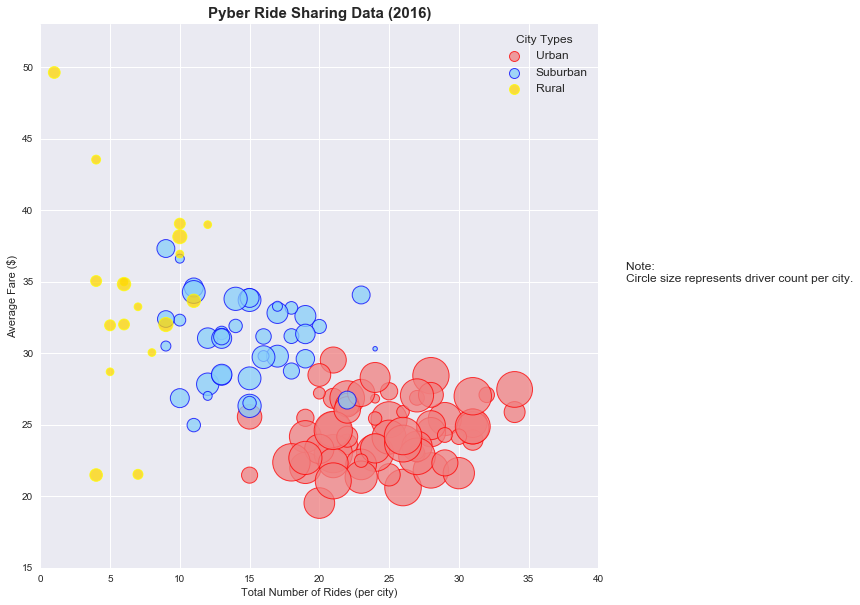

In [4]:
sns.set(rc={"figure.figsize": (10, 10)})

urban = city_ride_data[(city_ride_data.type == "Urban")]
suburban = city_ride_data[(city_ride_data.type == "Suburban")]
rural = city_ride_data[(city_ride_data.type == "Rural")]

urban_rides_per_city = urban.groupby([city_ride_data.city]).count()["ride_id"]
urban_average_fare = urban.groupby([city_ride_data.city]).mean()["fare"]
urban_driver_count = urban.groupby([city_ride_data.city]).mean()["driver_count"]

suburban_rides_per_city = suburban.groupby([city_ride_data.city]).count()["ride_id"]
suburban_average_fare = suburban.groupby([city_ride_data.city]).mean()["fare"]
suburban_driver_count = suburban.groupby([city_ride_data.city]).mean()["driver_count"]

rural_rides_per_city = rural.groupby([city_ride_data.city]).count()["ride_id"]
rural_average_fare = rural.groupby([city_ride_data.city]).mean()["fare"]
rural_driver_count = rural.groupby([city_ride_data.city]).mean()["driver_count"]

urban = plt.scatter(urban_rides_per_city, urban_average_fare, label = "Urban", s=urban_driver_count*20, marker='o', alpha = 0.75, c="lightcoral", edgecolors="red", linewidth=1)
suburban = plt.scatter(suburban_rides_per_city, suburban_average_fare, label = "Suburban",s=suburban_driver_count*20, marker="o", alpha = 0.75, c="lightskyblue", edgecolors="blue", linewidth=1)
rural = plt.scatter(rural_rides_per_city, rural_average_fare, label = "Rural", s=rural_driver_count*20,marker='o', alpha = 0.75, c="gold", edgecolors="yellow", linewidth=1)

plt.xlim(0, 40)
plt.ylim(15,53)

plt.title("Pyber Ride Sharing Data (2016)", FontSize=15, FontWeight='bold')
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("Average Fare ($)")

lgnd = plt.legend(title="City Types", fontsize=12)
lgnd.legendHandles[0]._sizes = [100]
lgnd.legendHandles[1]._sizes = [100]
lgnd.legendHandles[2]._sizes = [100]

plt.annotate("Note: \nCircle size represents driver count per city.", xy=(40, 40), xycoords='data',xytext=(42, 35),)
                
plt.grid(c="white")

plt.show()

# Total Fares by City Type

In [4]:
fare = rider_df.groupby("city")
faretotal = pd.DataFrame(fare["fare"].sum())
faretotal = faretotal.rename(columns={"fare": "Fare Total"})
faretotal = faretotal.reset_index()
faretotal.head(5)

,city,Fare Total
0,Alvarezhaven,741.79
1,Alyssaberg,535.85
2,Anitamouth,335.84
3,Antoniomouth,519.75
4,Aprilchester,417.65


In [5]:
citycount = city_df.groupby("city")
countcity = pd.DataFrame(citycount["type"].value_counts())
countcitytype = pd.DataFrame(countcity.rename(columns={"type": "City Count"}))
countcitytype = countcitytype.reset_index()
countcitytype.head(5)

,city,type,City Count
0,Alvarezhaven,Urban,1
1,Alyssaberg,Urban,1
2,Anitamouth,Suburban,1
3,Antoniomouth,Urban,1
4,Aprilchester,Urban,1


In [6]:
mergefarecity = pd.merge(faretotal, countcitytype, on="city", how="outer")
mergefarecity.head(5)

,city,Fare Total,type,City Count
0,Alvarezhaven,741.79,Urban,1
1,Alyssaberg,535.85,Urban,1
2,Anitamouth,335.84,Suburban,1
3,Antoniomouth,519.75,Urban,1
4,Aprilchester,417.65,Urban,1


In [7]:
grouptypeforfares = mergefarecity.groupby("type")
totalfarebytype = pd.DataFrame(grouptypeforfares["Fare Total"].sum())
totalfarebytype

,Fare Total
type,
Rural,4255.09
Suburban,19317.88
Urban,40078.34


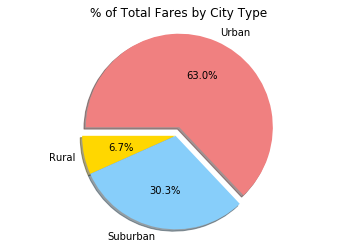

In [8]:
types = ["Rural","Suburban","Urban"]
fares= totalfarebytype
colors = ["gold", "lightskyblue","lightcoral"]
explode = (0, 0, 0.10)
plt.title("% of Total Fares by City Type")
plt.pie(fares, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")        
plt.show()

# Total Rides by City Type

In [9]:
citycount = city_df.groupby("city")
countcity = pd.DataFrame(citycount["type"].value_counts())
countcity.head(5)

,,type
city,type,
Alvarezhaven,Urban,1
Alyssaberg,Urban,1
Anitamouth,Suburban,1
Antoniomouth,Urban,1
Aprilchester,Urban,1


In [10]:
countcitytype = pd.DataFrame(countcity.rename(columns={"type": "City Count"}))
countcitytype.head(5)

,,City Count
city,type,
Alvarezhaven,Urban,1
Alyssaberg,Urban,1
Anitamouth,Suburban,1
Antoniomouth,Urban,1
Aprilchester,Urban,1


In [11]:
countcitytype = countcitytype.reset_index()
countcitytype.head(5)

,city,type,City Count
0,Alvarezhaven,Urban,1
1,Alyssaberg,Urban,1
2,Anitamouth,Suburban,1
3,Antoniomouth,Urban,1
4,Aprilchester,Urban,1


In [13]:
ridercity = rider_df.groupby("city")
countrider = pd.DataFrame(ridercity["ride_id"].count())
countrider.head(5)

,ride_id
city,
Alvarezhaven,31
Alyssaberg,26
Anitamouth,9
Antoniomouth,22
Aprilchester,19


In [14]:
countridertype = pd.DataFrame(countrider.rename(columns={"ride_id": "Ride Count"}))
countridertype.head(5)

,Ride Count
city,
Alvarezhaven,31
Alyssaberg,26
Anitamouth,9
Antoniomouth,22
Aprilchester,19


In [15]:
countridertype = countridertype.reset_index()
countridertype.head(5)

,city,Ride Count
0,Alvarezhaven,31
1,Alyssaberg,26
2,Anitamouth,9
3,Antoniomouth,22
4,Aprilchester,19


In [16]:
mergeridecity = pd.merge(countridertype, countcitytype, on="city", how="outer")
mergeridecity.head(5)

,city,Ride Count,type,City Count
0,Alvarezhaven,31,Urban,1
1,Alyssaberg,26,Urban,1
2,Anitamouth,9,Suburban,1
3,Antoniomouth,22,Urban,1
4,Aprilchester,19,Urban,1


In [17]:
groupcity = mergeridecity.groupby("type")
countridebytype = pd.DataFrame(groupcity["Ride Count"].sum())
countridebytype

,Ride Count
type,
Rural,125
Suburban,625
Urban,1625


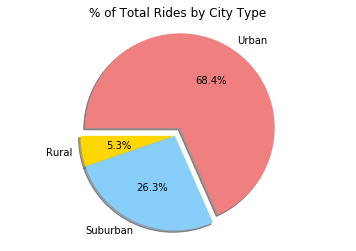

In [18]:
types = ["Rural","Suburban","Urban"]
rides = countridebytype
colors = ["gold", "lightskyblue","lightcoral"]
explode = (0, 0, 0.10)
plt.title("% of Total Rides by City Type")
plt.pie(rides, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")        

plt.show()

# Total Drivers by City Type

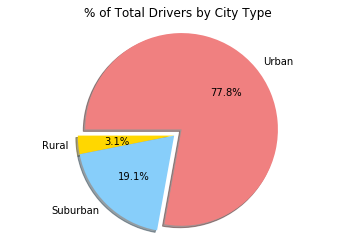

In [20]:
# Count how many times each type appears in our group
citytype = city_df.groupby("type")
countdriver = pd.DataFrame(citytype['driver_count'].sum())

types = ["Rural","Suburban","Urban"]
drivers = countdriver

colors = ["gold", "lightskyblue","lightcoral"]
explode = (0, 0, 0.10)
plt.title("% of Total Drivers by City Type")

plt.pie(drivers, explode=explode, labels=types, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.axis("equal")        

plt.show()

In [ ]:
#plt.savefig("Pyber_Analysis.png")
#plt.show()